In [1]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score

In [2]:
import joblib 
import numpy as np

import matplotlib.pyplot as plt

from colorml.utils.utils import plot_prediction_dist, read_pickle

%matplotlib inline

Using TensorFlow backend.


In [37]:
model_median = joblib.load('../results/gbm/regressor_medianrun_2020_05_31_12_05_1590919512.joblib')
model_01 = joblib.load('../results/gbm/regressor_0_1run_2020_05_31_12_05_1590919512.joblib')
model_09 = joblib.load('../results/gbm/regressor_0_9run_2020_05_31_12_05_1590919512.joblib')
model_mean = joblib.load('../results/gbm/regressor_meanrun_2020_05_31_12_05_1590919512.joblib')

y_scaler = joblib.load('../results/gbm/yscaler_run_2020_05_31_12_05_1590919512.joblib')
X_test = np.load('../results/gbm/X_test_run_2020_05_31_12_05_1590919512.npy')
X_train = np.load('../results/gbm/X_train_run_2020_05_31_12_05_1590919512.npy')
y_train = np.load('../results/gbm/y_train_run_2020_05_31_12_05_1590919512.npy')
y_test = np.load('../results/gbm/y_test_run_2020_05_31_12_05_1590919512.npy')
names = np.load('../results/gbm/y_names_run_2020_05_31_12_05_1590919512.npy', allow_pickle=True)

In [38]:
model_09.estimator.set_params(**{'alpha': .5})

LGBMRegressor(alpha=0.5, colsample_bytree=0.8445859337396231, max_depth=43,
              min_child_weight=0.011594897565619164, n_estimators=184,
              num_leaves=424, objective='quantile',
              reg_alpha=0.16872454674439044, reg_lambda=0.00021891539437930284,
              subsample=0.40439531058409134)

In [73]:
model_09.fit(X_train, y_train)

MultiOutputRegressor(estimator=LGBMRegressor(alpha=0.5,
                                             colsample_bytree=0.8445859337396231,
                                             max_depth=43,
                                             min_child_weight=0.011594897565619164,
                                             n_estimators=184, num_leaves=424,
                                             objective='quantile',
                                             reg_alpha=0.16872454674439044,
                                             reg_lambda=0.00021891539437930284,
                                             subsample=0.40439531058409134))

In [11]:
kmeans = KMeans(4)

In [12]:
kmeans.fit(
    np.vstack([y_train,  y_test])
)

KMeans(n_clusters=4)

In [13]:
colormapper = joblib.load('knn_map_rgb_string.joblib')

In [14]:
le = joblib.load('labelencoder.joblib')

In [42]:
quantile01_prediction = model_01.predict(X_test)
quantile09_prediction = model_09.predict(X_test)

median_prediction = model_median.predict(X_test)

mean_prediction = model_mean.predict(X_test)

In [75]:
quantile09_prediction

array([[ 0.61967517,  0.0080006 ,  0.90778426],
       [-1.50386255, -0.91504447,  0.18263088],
       [ 0.43646482,  0.61717095,  0.38409696],
       ...,
       [-1.96589062,  0.66993595, -1.10884638],
       [ 0.22259048, -1.21838944, -0.82888772],
       [ 0.52141815,  0.43873168, -0.01084537]])

In [63]:
median_means = kmeans.predict(mean_prediction)
y_true_means = kmeans.predict(y_test)

In [64]:
accuracy_score(y_true_means, median_means)

0.74296875

In [65]:
f1_score(y_true_means, median_means, average='macro')

0.6728842527957349

In [25]:
allowed = [i for i, n in enumerate(names) if n in ['red', 'green', 'brown', 'colorless', 'blue']]

In [26]:
names_encoded = le.transform(names[allowed])

In [27]:
list(zip(le.inverse_transform(colormapper.predict(y_scaler.inverse_transform(median_prediction[allowed]))), names[allowed]))

[('slightly pink', 'colorless'),
 ('greenish blue', 'blue'),
 ('light yellow', 'brown'),
 ('blue', 'blue'),
 ('purple red', 'red'),
 ('white', 'colorless'),
 ('light', 'colorless'),
 ('white', 'colorless'),
 ('white', 'colorless'),
 ('whiteish colorless', 'colorless'),
 ('deep yellow', 'red'),
 ('white', 'colorless'),
 ('white', 'colorless'),
 ('white', 'colorless'),
 ('white', 'colorless'),
 ('white', 'colorless'),
 ('white', 'colorless'),
 ('jasmine', 'colorless'),
 ('yellowish', 'colorless'),
 ('white', 'colorless'),
 ('deep blue', 'blue'),
 ('greenish blue', 'blue'),
 ('red', 'red'),
 ('white', 'colorless'),
 ('purple red', 'red'),
 ('orange', 'brown'),
 ('green', 'green'),
 ('slightly pink', 'colorless'),
 ('white', 'colorless'),
 ('jasmine', 'colorless'),
 ('light', 'colorless'),
 ('white', 'colorless'),
 ('light', 'colorless'),
 ('jasmine', 'colorless'),
 ('greenish blue', 'blue'),
 ('whiteish colorless', 'colorless'),
 ('white', 'colorless'),
 ('blue', 'blue'),
 ('white', 'colo

In [28]:
accuracy_score(names_encoded,colormapper.predict(y_scaler.inverse_transform(median_prediction[allowed])))

0.15849486887115166

In [29]:
blue_idx = [i for i, n in enumerate(names) if n == 'green']

In [3]:
augmentation_dict = read_pickle('../data/augment_dict.pkl')

/Users/kevinmaikjablonka/Dropbox (LSMO)/proj75_mofcolor/ml/colorml/utils/utils.py:368: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


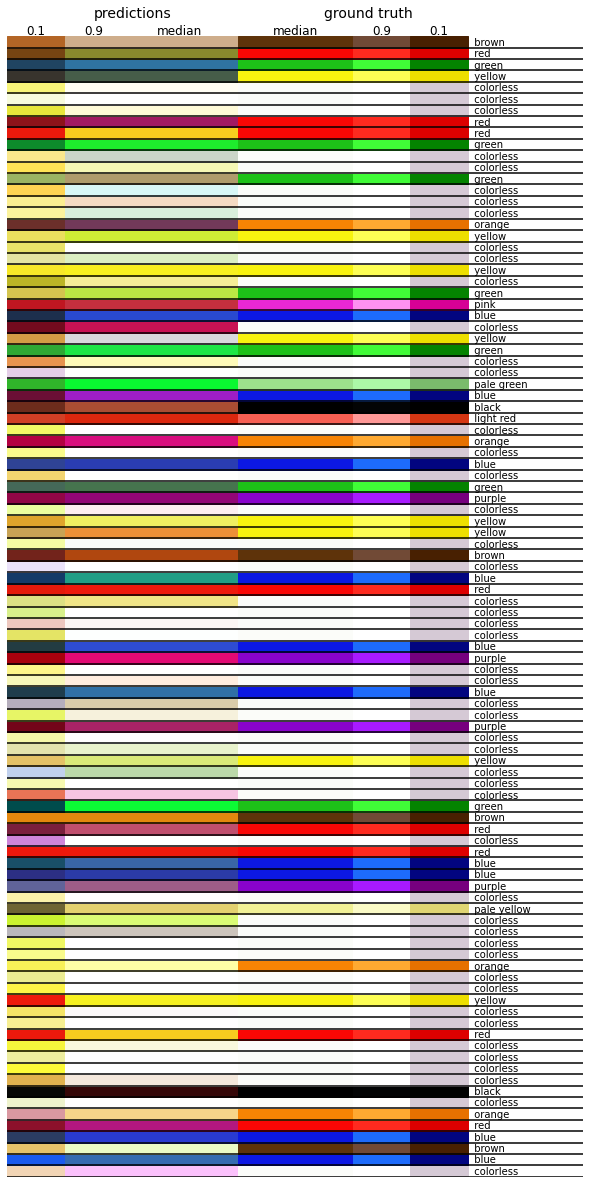

In [76]:
plot_prediction_dist(y_scaler.inverse_transform(quantile01_prediction), 
                     y_scaler.inverse_transform(median_prediction), 
                     y_scaler.inverse_transform(quantile09_prediction),
                     names,
                     augmentation_dict, 
                     100
                    )

In [43]:
a = y_scaler.inverse_transform(median_prediction)

In [44]:
b = y_scaler.inverse_transform(y_test)

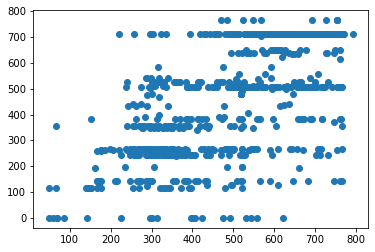

In [45]:
plt.scatter(y_scaler.inverse_transform(median_prediction).sum(axis=1), y_scaler.inverse_transform(y_test).sum(axis=1))

In [95]:
def ColorDistance(rgb1,rgb2):
    '''d = {} distance between two colors(3)'''
    rm = 0.5*(rgb1[0]+rgb2[0])
    d = np.sum((2+rm,4,3-rm)*(rgb1-rgb2)**2)**0.5
    return d

In [97]:
ColorDistance(a[0], b[0])

289.8483108312105

In [99]:
a[0]

array([251.68537309, 193.59362169, 252.43937189])

In [100]:
b[0]

array([232., 234., 244.])

In [101]:
!pip install colormath

Processing /Users/kevinmaikjablonka/Library/Caches/pip/wheels/1a/d7/a7/458a4632ccc8bfe436f5e9db9fef1aa84e5d243a1b4b4c7b59/colormath-3.0.0-py3-none-any.whl


In [9]:
from colormath.color_objects import sRGBColor, LabColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000# Red Color

i = 9
color1_rgb = sRGBColor(a[i][0], a[i][1], a[i][2], is_upscaled=True)

# Blue Color
color2_rgb = sRGBColor(b[i][0], b[i][1], b[i][2], is_upscaled=True)

# Convert from RGB to Lab Color Space
color1_lab = convert_color(color1_rgb, LabColor);

# Convert from RGB to Lab Color Space
color2_lab = convert_color(color2_rgb, LabColor);

# Find the color difference
delta_e = delta_e_cie2000(color1_lab, color2_lab);

NameError: name 'a' is not defined

In [ ]:
delta_e

In [ ]:
def get_delta_e(rgba, rgbb, upscaled=True):
    color1_rgb = sRGBColor(rgba[0], rgba[1], rgba[2], is_upscaled=True)
    color2_rgb = sRGBColor(rgbb[0], rgbb[1], rgbb[2], is_upscaled=True)

    # Convert from RGB to Lab Color Space
    color1_lab = convert_color(color1_rgb, LabColor);

    # Convert from RGB to Lab Color Space
    color2_lab = convert_color(color2_rgb, LabColor);

    # Find the color difference
    delta_e = delta_e_cie2000(color1_lab, color2_lab)
    
    return delta_e

In [16]:
color_delta_es = {}
means = []

for k,v in augmentation_dict.items():
    colors = len(v)
    meanc = []
    for i in range(colors):
        for j in range(colors): 
            if j>i: 
                meanc.append(get_delta_e(v[i], v[j]))
    color_delta_es[k] = meanc
    means.extend(meanc)

In [13]:
color_delta_es_medians = {}

for k, v in color_delta_es.items():
    color_delta_es_medians[k] = np.median(v)

In [27]:
smaller_5 = (np.array(list(color_delta_es_medians.values())) < 5)

In [32]:
5/len(color_delta_es_medians) * 100

3.571428571428571

In [33]:
color_delta_es_medians

{'amaranthine': 17.133877049889005,
 'amber': 16.78250967501643,
 'aquamarine': 27.45493439923363,
 'aubergine': 6.360234526029811,
 'azure': 18.752863616883594,
 'beige': 12.854870238330793,
 'black': 0.6690403877721824,
 'black brown': 11.943324183679362,
 'black green': 10.680589448715498,
 'black purple': 7.100646533995645,
 'black red': 7.316397139858927,
 'blackish purple': 7.501906673417155,
 'blue': 14.374019133608591,
 'blue green': 14.113023555911655,
 'blue violet': 9.350659328581383,
 'bluish violet': 6.653436361818926,
 'bright yellow': 5.867390831373608,
 'brown': 12.74530260973152,
 'brown orange': 14.884015337391311,
 'brown red': 6.457411928005046,
 'brown yellow': 12.496612952817975,
 'buff': 32.2950033705394,
 'cherry red': 12.279362263428574,
 'claybank': 26.17503421182174,
 'colorless': 5.66194485216962,
 'crimson': 15.245030137048277,
 'cyan': 10.528766477682769,
 'dark blue': 5.701484194374697,
 'dark brown': 9.349806779377232,
 'dark green': 12.480497096937468,


In [29]:
np.array(list(color_delta_es_medians.keys()))[smaller_5]

array(['black', 'red', 'white', 'whiteish colorless', 'yellow'],
      dtype='<U18')

In [36]:
np.mean(means)

12.10887233993671

(array([1.4676e+04, 1.0977e+04, 3.5140e+03, 1.1500e+03, 5.1600e+02,
        2.2800e+02, 9.6000e+01, 3.4000e+01, 2.7000e+01, 1.0000e+01]),
 array([ 0.        ,  9.23715197, 18.47430394, 27.71145591, 36.94860788,
        46.18575985, 55.42291182, 64.66006379, 73.89721576, 83.13436773,
        92.3715197 ]),
 <a list of 10 Patch objects>)

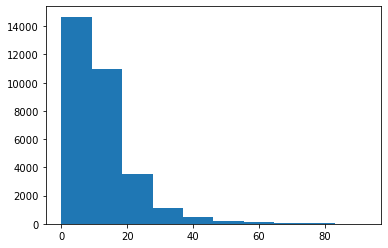

In [34]:
plt.hist(means)

In [46]:
differences = []


for ca, cb in zip(a, b):
    differences.append(get_delta_e(ca, cb))

In [47]:
np.median(differences)

16.132311267360382

In [155]:
import seaborn as sns

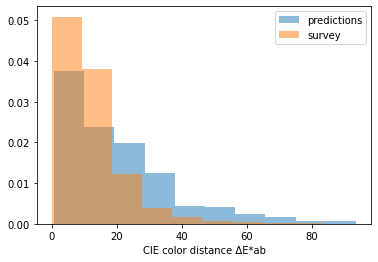

In [157]:
plt.hist(differences, density=True, alpha=.5, label='predictions')
plt.hist(means, density=True, alpha=.5, label='survey')
plt.xlabel('CIE color distance ΔE*ab')
plt.legend()